In [1]:
%pylab inline --no-import-all
import george
from george.kernels import MyDijetKernelSimp


import math
import time
import numpy as np
import scipy.stats as ss
import scipy.special as ssp
import scipy.optimize as op
from iminuit import Minuit

#import ROOT as r
#import warnings
#from rootpy.plotting import Hist, Hist2D, Legend, Canvas
#import rootpy.plotting.root2matplotlib as rplt

Populating the interactive namespace from numpy and matplotlib


In [2]:
xvalO = np.load("../GP_Paper/xvalO.npy")
yvalO = np.load("../GP_Paper/yvalO.npy")
xerrO = np.load("../GP_Paper/xerrO.npy")
xlowO = np.load("../GP_Paper/xlowO.npy")
xval = np.load("../GP_Paper/xval.npy")
yval = np.load("../GP_Paper/yval.npy")
xerr = np.load("../GP_Paper/xerr.npy")
smoothGPFit = np.load("../GP_Paper/initialGPfit.npy")


xvalO2D = xvalO.reshape(-1,1)
yvalO2D = yvalO.reshape(-1,1)

### LLH Ratio with and without constraint terms

In [3]:
def LLR_P(mean, data):
    return data*np.log(mean/data)-mean+data

([<matplotlib.axis.XTick at 0x11391f910>,
 <a list of 2 Text xticklabel objects>)

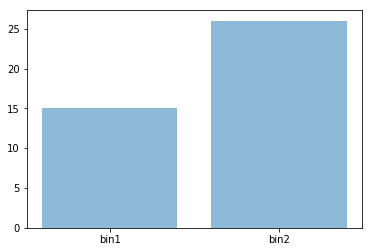

In [4]:
mu1 = 15.
mu2 = 26.
plt.bar([1,2], [mu1, mu2], align='center', alpha=0.5)
plt.xticks([1,2], ["bin1", "bin2"])

In [5]:
y1 = np.random.poisson(mu1, 10000)
y2 = np.random.poisson(mu2, 10000)

In [6]:
ll=[]
ll_const=[]
for i in range(10000):
    ll.append(-2*(LLR_P(mu1, y1[i])+LLR_P(mu2, y2[i])))
    ll_const.append(-2.*(LLR_P(mu1, y1[i])+LLR_P(mu2, y2[i])-0.5*(y1[i]-mu1)**2/4. - 0.5*(y2[i]-mu2)**2/4.))



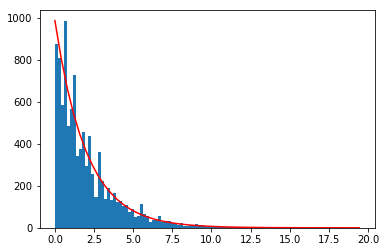

In [7]:
plt.figure()
ncounts, bins, patches = plt.hist(ll,100)
chiPDF=ss.chi2.pdf(np.linspace(min(ll),max(ll),50) , 2)
plt.plot(np.linspace(min(ll),max(ll),50), max(ncounts)*2.*chiPDF, c='r')

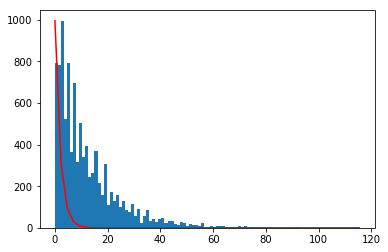

In [8]:
plt.figure()
ncounts, bins, patches = plt.hist(ll_const,100)
chiPDF=ss.chi2.pdf(np.linspace(min(ll_const),max(ll_const),50) , 2)
plt.plot(np.linspace(min(ll_const),max(ll_const),50), max(ncounts)*2.*chiPDF, c='r')